In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # for enhanced data visualization
from sklearn.preprocessing import StandardScaler # for removing the mean and scaling to unit variance
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression

In [41]:
# Load the dataset
data = pd.read_csv('prediction_de_fraud_2.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,2806.00,C1420196421,2806.0,0.00,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.0,0.00,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [42]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [0]:
# Get the predictive data and data to predict separately
X = data[['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']].values
y = data['isFraud'].values

In [0]:
# Transform categirical data to numerical
labelEnc = LabelEncoder()
X[:, 1] = labelEnc.fit_transform(X[:, 1])

In [0]:
# split the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
# remove the mean and scaling to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# Apply the Kernel PCA
kernelpca = KernelPCA(n_components=2, kernel='rbf')

In [0]:
X_train = kernelpca.fit_transform(X_train)
X_test = kernelpca.transform(X_test)

In [0]:
lg_classifier = LogisticRegression()

In [50]:
lg_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict the test result
y_pred = lg_classifier.predict(X_test)

In [0]:
def show_region(X, y, lg_classifier, test_idx = None, resolution = 0.02):
  markers = ('s', 'x', '0', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = lg_classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  X_test, y_test = X[test_idx, :], y[test_idx]
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
              alpha=0.8, c=cmap(idx),
              marker=markers[idx], label=cl)

  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='',
              alpha=1.0, linewidth=1, marker='o',
              s=55, label='test set')

In [0]:
X_combine = np.vstack((X_train, X_test))
# Use tables in vertical sequences
y_combine = np.hstack((y_train, y_test))
# Use tables in horizontal sequences

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


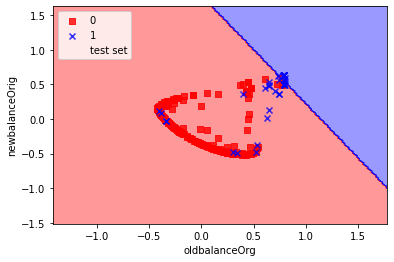

In [54]:
show_region(X_combine, y_combine, lg_classifier=lg_classifier, test_idx=range(105,150))
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.legend(loc='upper left')
plt.show()

In [0]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [56]:
print(cm)

[[60  0]
 [12  2]]
